# 4.10 Coding Etiquette

## Part 1

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\Nico\Desktop\Curso Data Analytics\Module 4\Instacart Basket Analysis'

In [4]:
merge_clean = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'merged_cleaned.pkl'))

In [45]:
departments =pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [5]:
merge_clean.head()

,user_id,First Name,Last Name,Gender,state,Age,date_joined,n_dependants,fam_status,income,...,busiest_day,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,Frecuency,ord_freq_flag,_merge
0,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy,Busiest day,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer,both
1,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy,Regular busy,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer,both
2,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy,Busiest day,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer,both
3,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy,Regular busy,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer,both
4,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy,Slowest day,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer,both


In [6]:
# Due to PII data concerns we have to drop first_name and last_name nad also unnecesary columns like _merge
merge_clean = merge_clean.drop(columns=['First Name', 'Last Name','_merge'] )

In [7]:
merge_clean.head()

,user_id,Gender,state,Age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,price_range_loc,busiest_day,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,Frecuency,ord_freq_flag
0,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,2543867.0,5.0,...,Mid-range product,Regular busy,Busiest day,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer
1,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,1285508.0,7.0,...,Mid-range product,Regular busy,Regular busy,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer
2,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,2578584.0,8.0,...,Mid-range product,Regular busy,Busiest day,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer
3,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,423547.0,2.0,...,Mid-range product,Regular busy,Regular busy,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer
4,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,2524893.0,3.0,...,Mid-range product,Regular busy,Slowest day,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer


In [8]:
# We are creating a regional segmmentation for officers and market analysis

region = []
for value in merge_clean ['state']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
                 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas',
                   'Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina',
                   'Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append ('West')

In [9]:
# add new region column
merge_clean ['region'] = region

In [10]:
# Different spending habits between regions
region_crosstab = pd.crosstab(merge_clean ['region'], merge_clean ['spending_flag'], dropna = False)

In [11]:
region_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [12]:
# Identify lis of customers that generate more revenue, we will drop customers with less than 5 orders
merge_clean.loc[merge_clean['max_order']>=5,'customer_activity']='High-revenue customer'
merge_clean.loc[merge_clean['max_order']<5,'customer_activity']='Low-revenue customer'

In [13]:
# Creating a new subset just for customer that generate more revenue to the company
high_revenue_customer = merge_clean [ merge_clean['customer_activity']=='High-revenue customer']

In [14]:
high_revenue_customer.head()

,user_id,Gender,state,Age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,Frecuency,ord_freq_flag,region,customer_activity
0,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,2543867.0,5.0,...,Busiest day,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer,Midwest,High-revenue customer
1,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,1285508.0,7.0,...,Regular busy,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer,Midwest,High-revenue customer
2,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,2578584.0,8.0,...,Busiest day,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer,Midwest,High-revenue customer
3,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,423547.0,2.0,...,Regular busy,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer,Midwest,High-revenue customer
4,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,2524893.0,3.0,...,Slowest day,Most orders,8.0,New customer,7.988889,Low spender,19.823529,Regular customer,Midwest,High-revenue customer


In [15]:
# export new data set created
high_revenue_customer.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_revenue_customers.pkl'))

In [16]:
high_revenue_customer.columns

Index(['user_id', 'Gender', 'state', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest Days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'Frecuency', 'ord_freq_flag', 'region',
       'customer_activity'],
      dtype='object')

# Customer Profile Analysis

### Age

In [20]:
merge_clean['Age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [32]:
# Create groups for age profile 
merge_clean.loc[merge_clean['Age'] >= 35 & (merge_clean['Age'] < 65), 'age_profile'] = 'Middle-aged'
merge_clean.loc[merge_clean['Age']<35,'age_profile']='Young adult'
merge_clean.loc[merge_clean['Age']>= 65,'age_profile']='Elderly'


In [33]:
merge_clean['age_profile'].value_counts()

Middle-aged    15202120
Young adult     8627655
Elderly         8575084
Name: age_profile, dtype: int64

<Axes: >

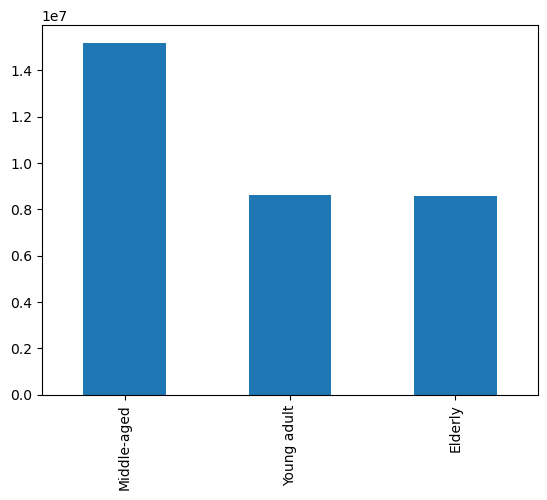

In [34]:
#Create visualization for demography
merge_clean['age_profile'].value_counts().plot.bar()

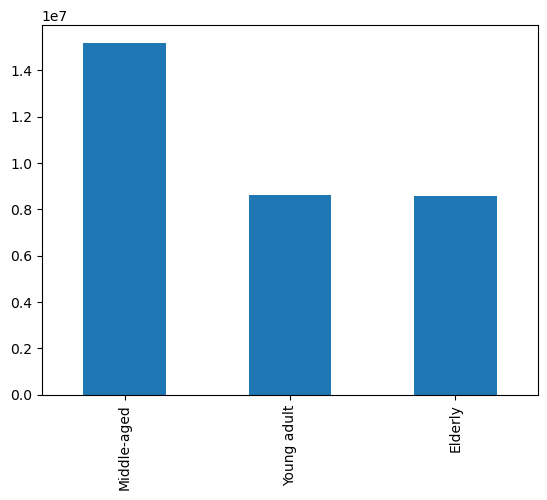

In [35]:
age_bar = merge_clean['age_profile'].value_counts().plot.bar()

In [36]:
#Export Image
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))

In [58]:
#merge 2 data sets:
df_complete = merge_clean.merge(departments, on = 'department_id')

In [39]:
# aggregate main variables on a customer-profile level for usage frequency and expenditure.
merge_clean.groupby('age_profile').agg({'days_since_last_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_last_order                   prices                
                              max       mean  min      max       mean  min
age_profile                                                               
Elderly                      30.0  11.078641  0.0  99999.0  11.768850  1.0
Middle-aged                  30.0  11.108966  0.0  99999.0  11.989499  1.0
Young adult                  30.0  11.120753  0.0  99999.0  12.173973  1.0

In [40]:
region_age = pd.crosstab(merge_clean['region'],merge_clean['age_profile'],dropna=False)

In [41]:
region_age

age_profile,Elderly,Middle-aged,Young adult
region,,,
Midwest,1990844,3603909,2002572
Northeast,1553903,2633291,1535542
South,2836257,5057303,2898325
West,2194080,3907617,2191216


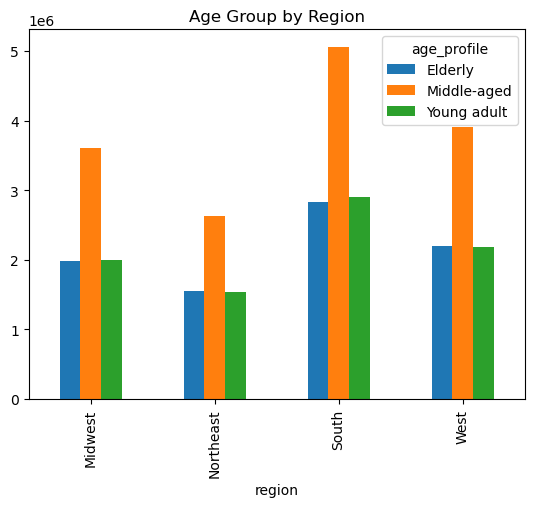

In [42]:
# Bar chart between age and region
regions_age = region_age.plot.bar()
plt.title('Age Group by Region')
plt.show()

#### The age of groups present the same bahaviour across different regions where Midle-aged group is higher than the other two variables the amounts are  differente but is understandabe due to population in those regions

In [44]:
#Exporting Visualization
regions_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Regions-age.png'))

In [46]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [47]:
# remane Unnamed: 0 to department_id
departments.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [48]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [59]:
# creating a crosstab between department and age
department_age = pd.crosstab(df_complete['department'],df_complete['age_profile'],dropna=False,)

In [60]:
department_age = department_age.sort_values(by=['Elderly'], ascending=True)

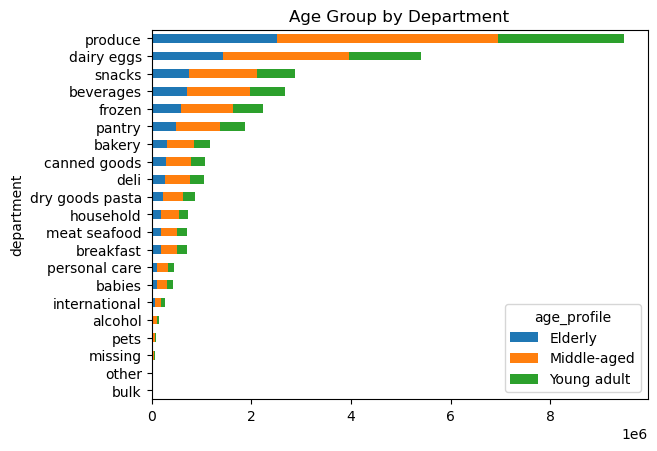

In [61]:
# Create visualization Ange and region 
department_age_vizualization=department_age.plot.barh(stacked=True)
plt.title('Age Group by Department')
plt.show()

In [63]:
#Exporting Visualization
department_age_vizualization.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age group by department.png'))

###  Income

In [64]:
df_complete['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [66]:
# create new column income_level to profile customers income level
df_complete.loc[df_complete['income'] >= 40000 & (df_complete['income'] < 80000), 'income_level'] = 'Moderate-income'
df_complete.loc[df_complete['income']<40000,'income_level']='Low-income'
df_complete.loc[df_complete['income']>= 80000,'income_level']='High-income'

In [67]:
# value counts for income groups
df_complete['income_level'].value_counts()

High-income        20831060
Moderate-income     9846601
Low-income          1727198
Name: income_level, dtype: int64

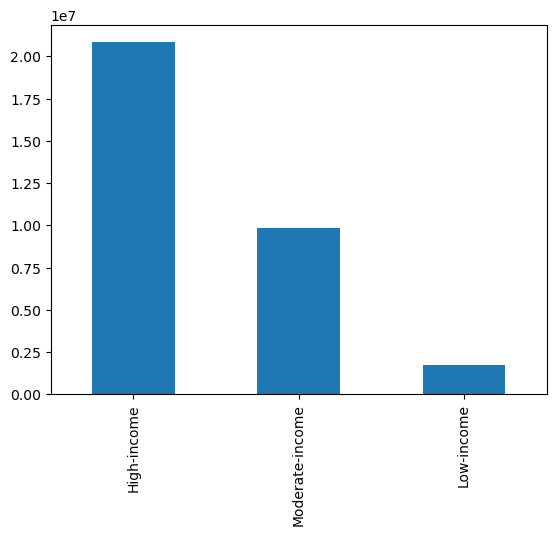

In [69]:
income_bar = df_complete['income_level'].value_counts().plot.bar()

In [70]:
#Exporting Visualization
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income_bar.png'))

In [71]:
# aggregate main variables on a customer-profile level for usage frequency and expenditure.
df_complete.groupby('income_level').agg({'days_since_last_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_last_order                   prices                
                                  max       mean  min      max       mean  min
income_level                                                                  
High-income                      30.0  11.045033  0.0  99999.0  14.473231  1.0
Low-income                       30.0  11.686944  0.0     25.0   6.495264  1.0
Moderate-income                  30.0  11.128019  0.0  14900.0   7.668248  1.0

In [73]:
# Create crosstab
region_income=pd.crosstab(df_complete['region'],df_complete['income_level'], dropna=False)

In [74]:
region_income = region_income.reindex(['Low-income', 'Moderate-income', 'High-income'], 
     axis="columns")

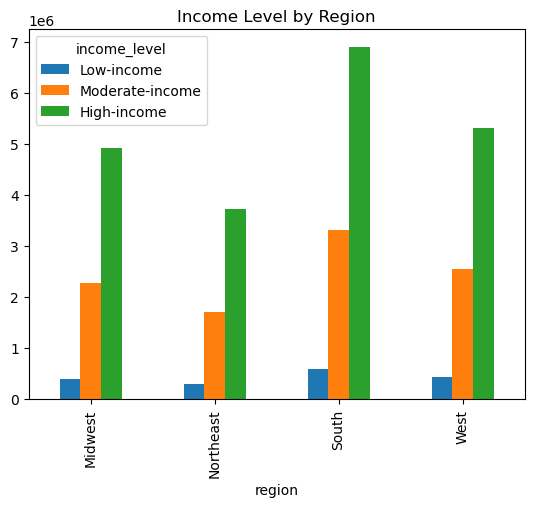

In [75]:
# create a bar chart between age and region
regions_income_vizualization=region_income.plot.bar()
plt.title('Income Level by Region')
plt.show()

In [77]:
#Exporting Visualization
regions_income_vizualization.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regions_income_viz.png'))

In [78]:
# creating a crosstab between department and income
department_income =pd.crosstab(df_complete['department'],df_complete['income_level'],dropna=False,)

In [79]:
department_income

income_level,High-income,Low-income,Moderate-income
department,,,
alcohol,99787,9593,44316
babies,287317,13352,123133
bakery,770599,53366,348463
beverages,1642715,202864,842544
breakfast,434105,49049,219879
bulk,20983,2359,11231
canned goods,714940,38849,314269
dairy eggs,3528170,251488,1619089
deli,677903,55209,318137


In [80]:
 department_income = department_income.sort_values(by=['Moderate-income'], ascending=True)

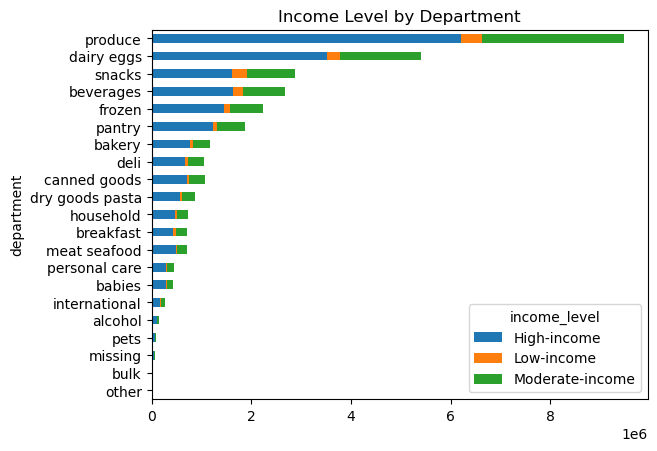

In [81]:
# create a bar chart between income and department
department_income_viz=department_income.plot.barh(stacked=True)
plt.title('Income Level by Department')
plt.show()

In [83]:
#Exporting Visualization
department_income_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_income_viz.png'))

##  Goods and Departments

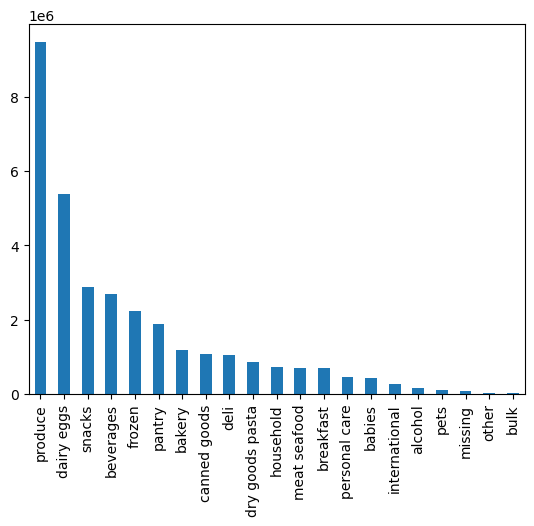

In [84]:
department_bar = df_complete['department'].value_counts().plot.bar()

In [86]:
#Exporting Visualization
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'))

### Profile for Customers that consume alcohol

In [87]:

df_complete.loc[df_complete['department_id'] == 5, 'alcohol_customer'] = 'alcohol consumer'

In [88]:
df_complete.loc[df_complete['department_id'] != 5, 'alcohol_customer'] = 'non-alcohol consumer'

In [89]:
# identify customers who are alcohol consumers
alch_values = df_complete.loc[df_complete['alcohol_customer'] == 'alcohol consumer', 'user_id'].unique()

In [90]:
alch_values

array(['125935.0', '130797.0', '83910.0', ..., '131857.0', '20302.0',
       '116898.0'], dtype=object)

In [91]:
# update alcohol_customer column
df_complete.loc[df_complete['user_id'].isin(alch_values), 'alcohol_customer'] = 'alcohol consumer'

In [92]:
df_complete['alcohol_customer'].value_counts()

non-alcohol consumer    29991046
alcohol consumer         2413813
Name: alcohol_customer, dtype: int64

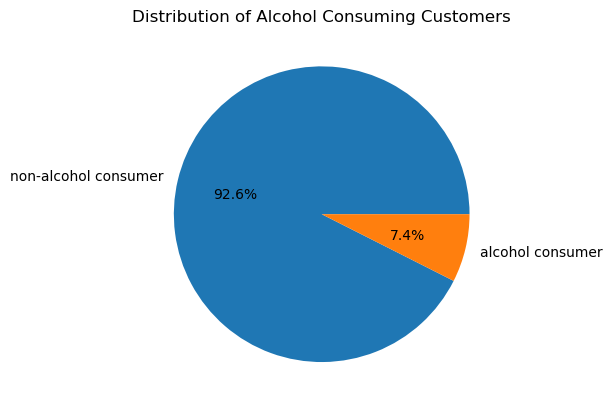

In [93]:
alcoho_pie = df_complete['alcohol_customer'].value_counts().plot.pie(title='Distribution of Alcohol Consuming Customers',label = '',autopct='%1.1f%%')

In [95]:
#Exporting Visualization
alcoho_pie.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','Alcohol Customers.png'))

In [96]:
# aggregate main variables on a customer-profile level for usage frequency and expenditure.
df_complete.groupby('alcohol_customer').agg({'days_since_last_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_last_order                   prices  \
                                       max       mean  min      max   
alcohol_customer                                                      
alcohol consumer                      30.0  10.885580  0.0  99999.0   
non-alcohol consumer                  30.0  11.121688  0.0  99999.0   

                                      
                           mean  min  
alcohol_customer                      
alcohol consumer      23.431691  1.0  
non-alcohol consumer  11.058561  1.0

In [97]:
region_alcohol = pd.crosstab(df_complete['region'],df_complete['alcohol_customer'], dropna=False)

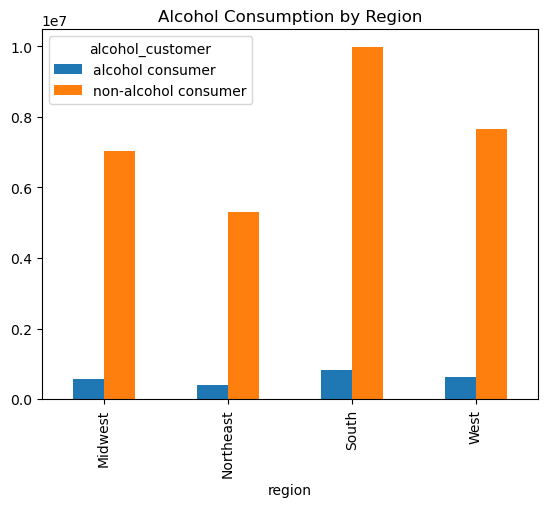

In [98]:
# create a bar chart between age and region
regions_alcohol_viz=region_alcohol.plot.bar()
plt.title('Alcohol Consumption by Region')
plt.show()

In [99]:
#Exporting Visualization
regions_alcohol_viz.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','Alcohol Cusumption by Region.png'))

### Profile of peolpe that have dependants

In [101]:
# create segmentation for each customer: 
df_complete.loc[(df_complete['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_complete['n_dependants']==0), 'family_flag'] = 'single no dependants'
df_complete.loc[(df_complete['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_complete['n_dependants'] >=1), 'family_flag'] = 'single with dependants'
df_complete.loc[(df_complete['fam_status'] == 'married') & (df_complete['n_dependants'] == 1), 'family_flag'] = 'married no dependants'
df_complete.loc[(df_complete['fam_status'] == 'married') & (df_complete['n_dependants'] > 1), 'family_flag'] = 'married with dependants'

In [102]:
df_complete['family_flag'].value_counts()

married with dependants    15205849
single no dependants        8097503
married no dependants       7550904
single with dependants      1550603
Name: family_flag, dtype: int64

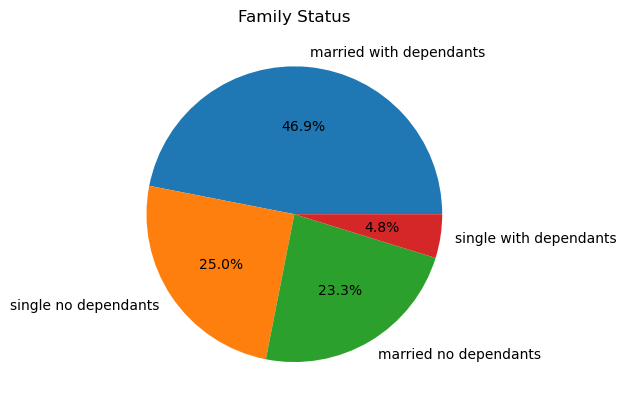

In [103]:
family_flag_pie = df_complete['family_flag'].value_counts().plot.pie(title = 'Family Status', label = '', autopct='%1.1f%%')

In [104]:
#Exporting Visualization
family_flag_pie.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','Alcohol Cusumption by Region.png'))

In [105]:
# aggregate main variables on a customer-profile.
df_complete.groupby('family_flag').agg({'days_since_last_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_last_order                   prices  \
                                          max       mean  min      max   
family_flag                                                              
married no dependants                    30.0  11.113141  0.0  99999.0   
married with dependants                  30.0  11.117681  0.0  99999.0   
single no dependants                     30.0  11.080805  0.0  99999.0   
single with dependants                   30.0  11.048170  0.0  99999.0   

                                         
                              mean  min  
family_flag                              
married no dependants    11.705834  1.0  
married with dependants  12.154546  1.0  
single no dependants     12.129243  1.0  
single with dependants   10.828768  1.0

In [107]:
region_family=pd.crosstab(df_complete['region'],df_complete['family_flag'], dropna=False)

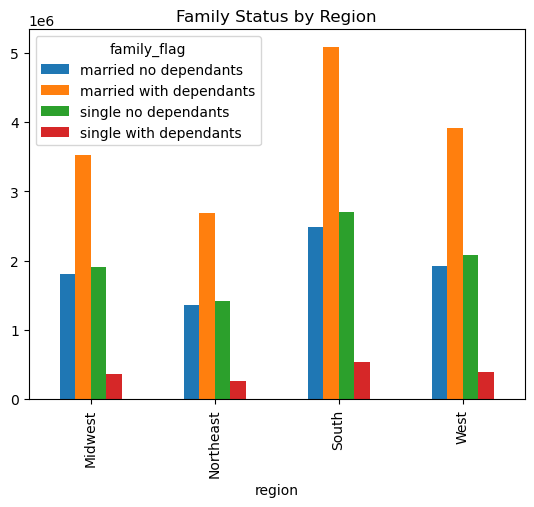

In [108]:
# create a bar chart between age and region
regions_family_viz=region_family.plot.bar()
plt.title('Family Status by Region')
plt.show()

In [110]:
#Exporting Visualization
regions_family_viz.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','Family Status by region.png'))

In [111]:
# creating a crosstab between department and income
department_family=pd.crosstab(df_complete['department'],df_complete['family_flag'],dropna=False,)

In [112]:
department_family = department_family.sort_values(by=['married with dependants'], ascending=True)

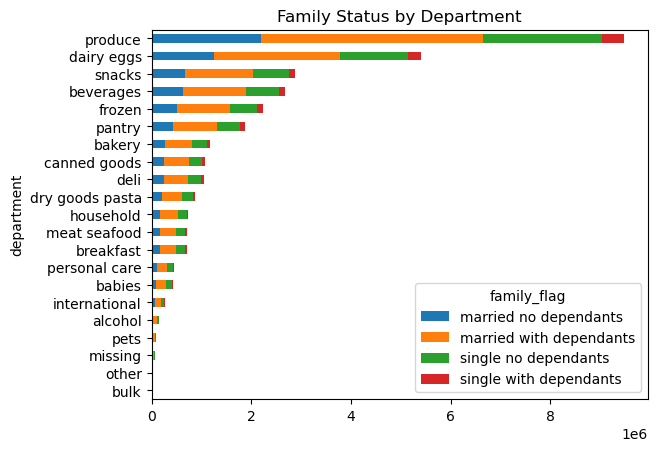

In [113]:
# create a bar chart between income and department
department_family_viz=department_family.plot.barh(stacked=True)
plt.title('Family Status by Department')
plt.show()

In [114]:
#Exporting Visualization
department_family_viz.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','Family Status by department.png'))

In [115]:
df_complete.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'DF complete 410.pkl'))